In [1]:
from reader import read_json_file, validate

fpath = "./data_processed_1prod_full.json"

df_arguments = read_json_file(fpath)
df_arguments

,reviewText,overall,vote
0,I always get a half size up in my tennis shoes...,3,7.0
1,Put them on and walked 3 hours with no problem...,5,NaN
2,excelente,5,NaN
3,The shoes fit well in the arch area. They are ...,4,NaN
4,Tried them on in a store before buying online ...,5,22.0
...,...,...,...
366,Favorite Nike shoe ever! The flex sole is exce...,5,NaN
367,"I wear these everyday to work, the gym, etc.",5,NaN
368,"Love these shoes! Great fit, very light weight.",5,NaN
369,Super comfortable and fit my small feet perfec...,5,NaN


In [2]:
df_arguments = df_arguments[["reviewText", "overall"]]
df_arguments = validate(df_arguments)
df_arguments

,argument,score
0,I always get a half size up in my tennis shoes...,3
1,Put them on and walked 3 hours with no problem...,5
2,excelente,5
3,The shoes fit well in the arch area. They are ...,4
4,Tried them on in a store before buying online ...,5
...,...,...
366,Favorite Nike shoe ever! The flex sole is exce...,5
367,"I wear these everyday to work, the gym, etc.",5
368,"Love these shoes! Great fit, very light weight.",5
369,Super comfortable and fit my small feet perfec...,5


In [3]:
from chunker import ArgumentChunker

/Volumes/Databank/Workspace/orange3-argument/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Volumes/Databank/Workspace/orange3-argument/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Volumes/Databank/Workspace/orange3-argument/venv/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-b

In [4]:
chunker = ArgumentChunker(df_arguments["argument"])
df_chunks = chunker.get_chunk_table()
df_topics = chunker.get_topic_table()

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


You should consider upgrading via the '/Volumes/Databank/Workspace/orange3-argument/venv/bin/python -m pip install --upgrade pip' command.


In [5]:
df_chunks

,argument_id,chunk,topic,rank,polarity_score
0,0,I always get a half size up in my tennis shoes .,8,0.500000,-0.166667
1,0,For some reason these feel to big in the heel ...,12,0.500000,-0.050000
2,1,walked 3 hours with no problem,-1,0.250499,0.000000
3,1,Put them on and !,22,0.254264,0.000000
4,1,Love them !,1,0.243132,0.625000
...,...,...,...,...,...
1193,369,I can wear the shoe all day long and,22,0.125172,-0.050000
1194,369,they are easy to clean compared to other shoes...,-1,0.126065,0.225000
1195,369,They are light colored so any dirt will be see...,18,0.126167,0.342857
1196,369,Would definitely buy another pair in a differe...,20,0.124584,0.000000


In [6]:
df_topics.head()

,topic,count,name,keywords,representative_doc
0,-1,169,-1_compared_sole_hope_fan,"[compared, sole, hope, fan, problem, cushionin...",[This is the optimal sneaker that is flexible ...
1,0,107,0_fits_true_expected_perfect,"[fits, true, expected, perfect, fit, glove, ac...",[Fit exactly as expected in length and width !...
2,1,74,1_favorite_turned_absolute_love,"[favorite, turned, absolute, love, liked, dail...","[These are my absolute favorite ., Absolute fa..."
3,2,55,2_bad_cool_issues_stylish,"[bad, cool, issues, stylish, attractive, cushi...",[They are really light and not as sturdy as wh...
4,3,39,3_purchase_pleased_satisfied_shipping,"[purchase, pleased, satisfied, shipping, produ...","[I am very satisfied with this purchase, Very ..."


In [7]:
from processor import ArgumentProcessor

In [8]:
processor = ArgumentProcessor(df_arguments)
df_arguments = processor.get_argument_table(df_chunks)
df_arguments

,argument,score,topics,sentiment,coherence
0,I always get a half size up in my tennis shoes...,3,"[8, 12]",0.445833,0.992692
1,Put them on and walked 3 hours with no problem...,5,"[-1, 22, 1, 6]",0.626400,0.705434
2,excelente,5,[-1],0.500000,0.535261
3,The shoes fit well in the arch area. They are ...,4,"[24, 12, 12, 21]",0.525745,0.881856
4,Tried them on in a store before buying online ...,5,"[-1, 9, 2, -1, 3]",0.712567,0.813390
...,...,...,...,...,...
366,Favorite Nike shoe ever! The flex sole is exce...,5,"[1, 14, -1, 4, 7, 5, 11, 20]",0.597480,0.666939
367,"I wear these everyday to work, the gym, etc.",5,[7],0.400000,0.406570
368,"Love these shoes! Great fit, very light weight.",5,"[23, 0]",0.799583,0.904460
369,Super comfortable and fit my small feet perfec...,5,"[0, 5, -1, 2, 22, -1, 18, 20]",0.596412,0.665505


array([[<Axes: title={'center': 'sentiment'}>,
        <Axes: title={'center': 'coherence'}>]], dtype=object)

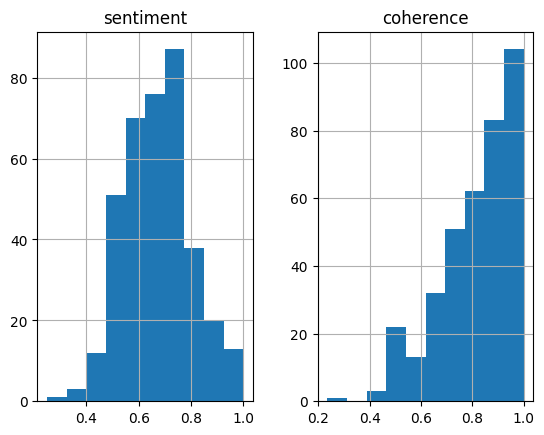

In [10]:
# plots for showing distribution of measures
df_arguments[["sentiment", "coherence"]].hist()

In [11]:
from orangecontrib.argument.miner.miner import ArgumentMiner

df_arguments["topics"] = df_arguments["topics"].astype(str)
miner = ArgumentMiner(df_arguments)
last_topic = df_topics["topic"].max()
df_nodes = miner.select_by_topic(25)
df_edges = miner.get_edge_table(df_nodes)
df_nodes = miner.get_node_table(df_edges, df_nodes)
df_edges = miner.map_edge_tables(df_edges, df_nodes)
print("Last topic: %d" % last_topic)

Last topic: 27


In [12]:
df_edges.sort_values(by=["target", "source"])


,weight,source,target
0,0.199327,5,0
1,0.114537,16,0
2,0.170219,5,1
3,0.085429,16,1
4,0.379034,5,2
5,0.294245,16,2
6,0.252604,5,3
7,0.167815,16,3
8,0.228272,5,4
9,0.143483,16,4


In [13]:
df_nodes.sort_values(by="label", ascending=False)


,argument,score,topics,sentiment,coherence,argument_id,label
16,I am a recess aide and on my feet all day long...,4,"[4, 15, 27, 2, 2, 17, 6, -1, 22, 4, -1, -1, 22...",0.559380,0.913164,349,supportive
5,I have had this style before in a different co...,4,"[25, 11, 21, 10, 9]",0.721377,0.997954,118,supportive
9,I love these and have them in a light blue too...,5,"[25, 1, 2]",0.693001,0.790080,179,defeated
15,Love these shoes. My feet have been weird sinc...,5,"[25, -1, 4, 15, 2, -1, 2]",0.555640,0.610400,326,defeated
14,Favorite training and walking-around sneakers....,5,"[10, 15, 2, 21, 9, 12, 25, 24, 12, 7, 23, -1, ...",0.604562,0.676429,315,defeated
13,These shoes are great. This is the second pai...,5,"[25, 1, 16]",0.716065,0.817465,293,defeated
12,love these shoes. use them to workout inside a...,5,"[25, 7]",0.625000,0.703588,228,defeated
11,I have gotten so many compliments on the blue ...,5,"[25, 5, 7, 8]",0.678416,0.772178,213,defeated
10,I love these shoes and have worn them for a lo...,5,"[9, 25, 21, 18]",0.667844,0.758950,189,defeated
0,Love these shoes. My feet feel so much better....,5,"[25, 4, 2]",0.700093,0.798627,11,defeated
